# **Msc project UEL - Computational Drug Discovery Diphtheria

1.   List item
2.   List item

Exploratory Data Analysis**



we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-04-04 19:49:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M  94.5MB/s    in 0.9s    

2024-04-04 19:49:59 (94.5 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2

## **Load bioactivity data**

In [ ]:
! wget https://raw.githubusercontent.com/powhenagbo/UELPROJECT/master/Diphtheria_03_bioactivity_data_curated.csv

--2024-04-04 19:50:57--  https://raw.githubusercontent.com/powhenagbo/UELPROJECT/master/Diphtheria_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212653 (208K) [text/plain]
Saving to: ‘Diphtheria_03_bioactivity_data_curated.csv.1’

Diphtheria_03_bioac 100%[===================>] 207.67K  --.-KB/s    in 0.03s   

2024-04-04 19:50:57 (6.34 MB/s) - ‘Diphtheria_03_bioactivity_data_curated.csv.1’ saved [212653/212653]



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv ('Diphtheria_03_bioactivity_data_curated.csv')
df


,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL110347,CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...,5000.00,intermediate
1,CHEMBL108702,Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...,20.00,active
2,CHEMBL418816,O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...,3000.00,intermediate
3,CHEMBL108968,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...,30.00,active
4,CHEMBL430707,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...,35.00,active
...,...,...,...,...
2702,CHEMBL5195834,CCc1cc2ncc(CN3CC[C@H](Nc4ccc(C(=O)NC)nc4)C3)cc...,33.00,active
2703,CHEMBL5208807,CCc1cc2ncc(CN3CCN(c4ccc(C(N)C(F)(F)F)nc4)CC3)c...,2500.00,intermediate
2704,CHEMBL5182405,O=C(COc1ccc2c(c1)CCCN2C(=O)CCl)NCCCCCCCCCC(=O)...,2.74,active
2705,CHEMBL5209870,COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...,4.60,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL110347,5000.00,intermediate,CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...
1,CHEMBL108702,20.00,active,Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...
2,CHEMBL418816,3000.00,intermediate,O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...
3,CHEMBL108968,30.00,active,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...
4,CHEMBL430707,35.00,active,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...
...,...,...,...,...
2702,CHEMBL5195834,33.00,active,CCc1cc2ncc(CN3CC[C@H](Nc4ccc(C(=O)NC)nc4)C3)cc...
2703,CHEMBL5208807,2500.00,intermediate,CCc1cc2ncc(CN3CCN(c4ccc(C(N)C(F)(F)F)nc4)CC3)c...
2704,CHEMBL5182405,2.74,active,O=C(COc1ccc2c(c1)CCCN2C(=O)CCl)NCCCCCCCCCC(=O)...
2705,CHEMBL5209870,4.60,active,COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

### **Calculate descriptors**

,molecule_chembl_id,standard_value,class,canonical_smiles,structure
0,CHEMBL110347,5000.0,intermediate,CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...,
1,CHEMBL108702,20.0,active,Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...,
2,CHEMBL418816,3000.0,intermediate,O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...,
3,CHEMBL108968,30.0,active,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...,
4,CHEMBL430707,35.0,active,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...,

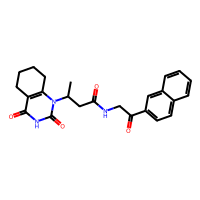
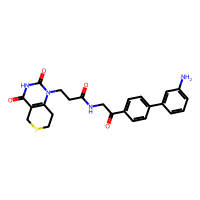
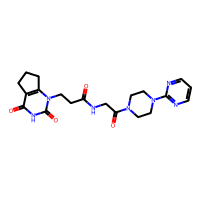
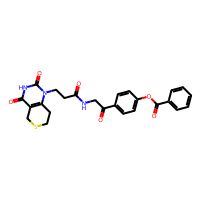
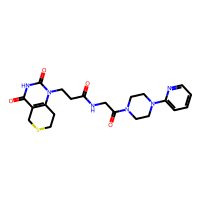

In [ ]:
!pip install rdkit
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, PandasTools

# Example: Assuming df_clean_smiles is already defined and contains a column 'canonical_smiles' with SMILES strings
# Add molecule structures to the DataFrame
PandasTools.AddMoleculeColumnToFrame(df_clean_smiles, smilesCol='canonical_smiles', molCol='structure')

# To display the DataFrame with images, simply output the DataFrame in a cell
# Adjust the number inside head() as needed
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=True)
df_clean_smiles.head()



In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,419.481,2.51880,2.0,5.0
1,464.547,1.96430,3.0,7.0
2,427.465,-1.32960,2.0,8.0
3,493.541,1.93430,2.0,8.0
4,458.544,-0.42400,2.0,8.0
...,...,...,...,...
2702,406.490,1.92650,3.0,6.0
2703,446.477,2.76480,2.0,6.0
2704,801.360,5.77140,2.0,7.0
2705,489.528,3.78084,2.0,7.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,419.481,2.51880,2.0,5.0
1,464.547,1.96430,3.0,7.0
2,427.465,-1.32960,2.0,8.0
3,493.541,1.93430,2.0,8.0
4,458.544,-0.42400,2.0,8.0
...,...,...,...,...
2702,406.490,1.92650,3.0,6.0
2703,446.477,2.76480,2.0,6.0
2704,801.360,5.77140,2.0,7.0
2705,489.528,3.78084,2.0,7.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL110347,CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...,5000.00,intermediate
1,CHEMBL108702,Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...,20.00,active
2,CHEMBL418816,O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...,3000.00,intermediate
3,CHEMBL108968,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...,30.00,active
4,CHEMBL430707,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...,35.00,active
...,...,...,...,...
2702,CHEMBL5195834,CCc1cc2ncc(CN3CC[C@H](Nc4ccc(C(=O)NC)nc4)C3)cc...,33.00,active
2703,CHEMBL5208807,CCc1cc2ncc(CN3CCN(c4ccc(C(N)C(F)(F)F)nc4)CC3)c...,2500.00,intermediate
2704,CHEMBL5182405,O=C(COc1ccc2c(c1)CCCN2C(=O)CCl)NCCCCCCCCCC(=O)...,2.74,active
2705,CHEMBL5209870,COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...,4.60,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL110347,CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...,5000.00,intermediate,419.481,2.51880,2.0,5.0
1,CHEMBL108702,Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...,20.00,active,464.547,1.96430,3.0,7.0
2,CHEMBL418816,O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...,3000.00,intermediate,427.465,-1.32960,2.0,8.0
3,CHEMBL108968,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...,30.00,active,493.541,1.93430,2.0,8.0
4,CHEMBL430707,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...,35.00,active,458.544,-0.42400,2.0,8.0
...,...,...,...,...,...,...,...,...
2702,CHEMBL5195834,CCc1cc2ncc(CN3CC[C@H](Nc4ccc(C(=O)NC)nc4)C3)cc...,33.00,active,406.490,1.92650,3.0,6.0
2703,CHEMBL5208807,CCc1cc2ncc(CN3CCN(c4ccc(C(N)C(F)(F)F)nc4)CC3)c...,2500.00,intermediate,446.477,2.76480,2.0,6.0
2704,CHEMBL5182405,O=C(COc1ccc2c(c1)CCCN2C(=O)CCl)NCCCCCCCCCC(=O)...,2.74,active,801.360,5.77140,2.0,7.0
2705,CHEMBL5209870,COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...,4.60,active,489.528,3.78084,2.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/powhenagbo/UELPROJECT/blob/main/newfile_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count    2.707000e+03
mean     4.386965e+06
std      2.277581e+08
min      2.000000e-02
25%      1.765000e+01
50%      9.000000e+01
75%      1.000000e+03
max      1.185000e+10
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL110347,CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...,intermediate,419.481,2.51880,2.0,5.0,5000.00
1,CHEMBL108702,Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...,active,464.547,1.96430,3.0,7.0,20.00
2,CHEMBL418816,O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...,intermediate,427.465,-1.32960,2.0,8.0,3000.00
3,CHEMBL108968,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...,active,493.541,1.93430,2.0,8.0,30.00
4,CHEMBL430707,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...,active,458.544,-0.42400,2.0,8.0,35.00
...,...,...,...,...,...,...,...,...
2702,CHEMBL5195834,CCc1cc2ncc(CN3CC[C@H](Nc4ccc(C(=O)NC)nc4)C3)cc...,active,406.490,1.92650,3.0,6.0,33.00
2703,CHEMBL5208807,CCc1cc2ncc(CN3CCN(c4ccc(C(N)C(F)(F)F)nc4)CC3)c...,intermediate,446.477,2.76480,2.0,6.0,2500.00
2704,CHEMBL5182405,O=C(COc1ccc2c(c1)CCCN2C(=O)CCl)NCCCCCCCCCC(=O)...,active,801.360,5.77140,2.0,7.0,2.74
2705,CHEMBL5209870,COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...,active,489.528,3.78084,2.0,7.0,4.60


In [ ]:
df_norm.standard_value_norm.describe()

count    2.707000e+03
mean     4.636608e+04
std      1.924622e+06
min      2.000000e-02
25%      1.765000e+01
50%      9.000000e+01
75%      1.000000e+03
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL110347,CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...,intermediate,419.481,2.51880,2.0,5.0,5.301030
1,CHEMBL108702,Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...,active,464.547,1.96430,3.0,7.0,7.698970
2,CHEMBL418816,O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...,intermediate,427.465,-1.32960,2.0,8.0,5.522879
3,CHEMBL108968,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...,active,493.541,1.93430,2.0,8.0,7.522879
4,CHEMBL430707,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...,active,458.544,-0.42400,2.0,8.0,7.455932
...,...,...,...,...,...,...,...,...
2702,CHEMBL5195834,CCc1cc2ncc(CN3CC[C@H](Nc4ccc(C(=O)NC)nc4)C3)cc...,active,406.490,1.92650,3.0,6.0,7.481486
2703,CHEMBL5208807,CCc1cc2ncc(CN3CCN(c4ccc(C(N)C(F)(F)F)nc4)CC3)c...,intermediate,446.477,2.76480,2.0,6.0,5.602060
2704,CHEMBL5182405,O=C(COc1ccc2c(c1)CCCN2C(=O)CCl)NCCCCCCCCCC(=O)...,active,801.360,5.77140,2.0,7.0,8.562249
2705,CHEMBL5209870,COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...,active,489.528,3.78084,2.0,7.0,8.337242


In [ ]:
df_final.pIC50.describe()

count    2707.000000
mean        6.849743
std         1.280480
min         1.000000
25%         6.000000
50%         7.045757
75%         7.753257
max        10.698970
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [ ]:
df_final.to_csv('Diphtheria_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL108702,Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...,active,464.547,1.96430,3.0,7.0,7.698970
3,CHEMBL108968,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...,active,493.541,1.93430,2.0,8.0,7.522879
4,CHEMBL430707,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...,active,458.544,-0.42400,2.0,8.0,7.455932
5,CHEMBL321638,COc1ccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...,active,479.558,2.39070,2.0,7.0,7.823909
6,CHEMBL108316,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...,active,460.520,-1.63400,2.0,10.0,7.301030
...,...,...,...,...,...,...,...,...
2701,CHEMBL5179882,CCc1cc2ncc(CN3CC[C@@H](Nc4ccc(C(=O)NC)nc4)C3)c...,active,406.490,1.92650,3.0,6.0,9.309804
2702,CHEMBL5195834,CCc1cc2ncc(CN3CC[C@H](Nc4ccc(C(=O)NC)nc4)C3)cc...,active,406.490,1.92650,3.0,6.0,7.481486
2704,CHEMBL5182405,O=C(COc1ccc2c(c1)CCCN2C(=O)CCl)NCCCCCCCCCC(=O)...,active,801.360,5.77140,2.0,7.0,8.562249
2705,CHEMBL5209870,COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...,active,489.528,3.78084,2.0,7.0,8.337242


Let's write this to CSV file.

In [ ]:
df_2class.to_csv('Diphtheria_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

<ipython-input-71-c457a08f85ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['#1f77b4', '#ff7f0e'])  # Adjust colors as needed


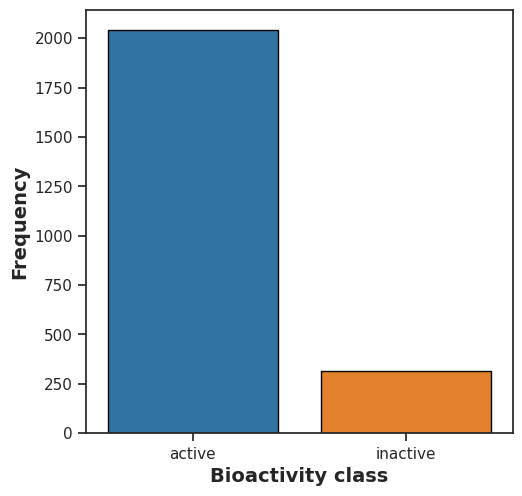

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['#1f77b4', '#ff7f0e'])  # Adjust colors as needed

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


<ipython-input-87-627d3dfe0e95>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['#1f77b4', '#ff7f0e'])


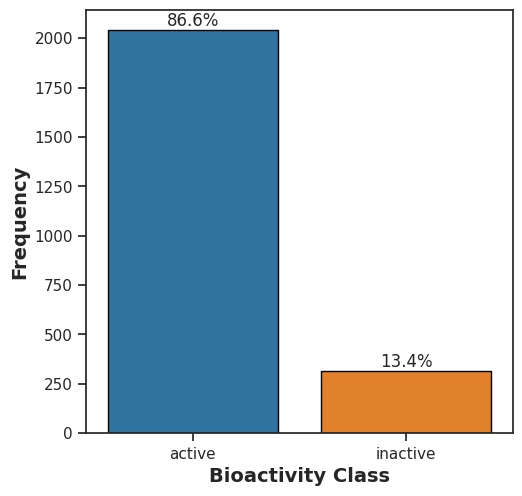

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_2class is your DataFrame and it already exists with a 'class' column.

plt.figure(figsize=(5.5, 5.5))
ax = sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['#1f77b4', '#ff7f0e'])

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Calculate the percentages and annotate the bars
total = len(df_2class['class'])  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X position of annotation
    y = p.get_height()  # Y position of annotation
    ax.annotate(percentage, (x, y), ha='center', va='bottom')  # Place the annotation on the bar

plt.savefig('plot_bioactivity_class_with_percentage.pdf')


### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

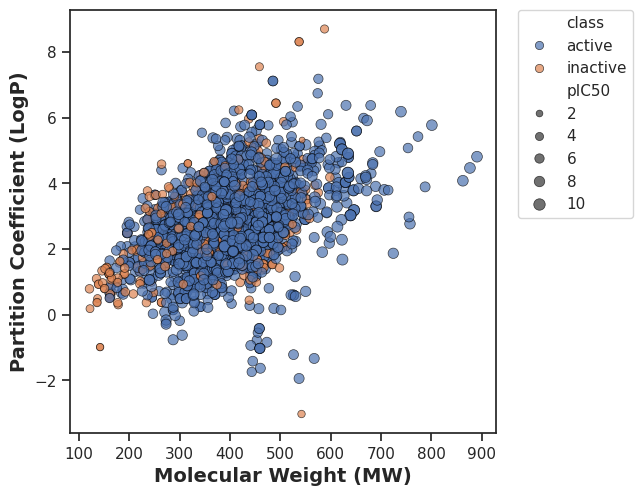

In [ ]:

# Set the figure size
plt.figure(figsize=(5.5, 5.5))

# Create a scatter plot with MW vs LogP, color by class, and size by pIC50
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

# Set the x and y labels with font specifications
plt.xlabel('Molecular Weight (MW)', fontsize=14, fontweight='bold')
plt.ylabel('Partition Coefficient (LogP)', fontsize=14, fontweight='bold')

# Adjust the legend position and border
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Save the plot to a file
plt.savefig('plot_MW_vs_LogP.pdf', bbox_inches='tight')


### **Box plots**

#### **pIC50 value**

<ipython-input-73-fe5297eb5cad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='pIC50', data=df_2class, palette=['blue', 'orange'])


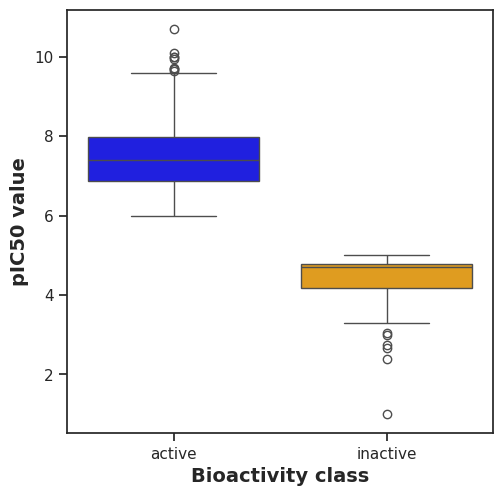

In [ ]:
plt.figure(figsize=(5.5, 5.5))

# Use a predefined color palette with blue and orange
sns.boxplot(x='class', y='pIC50', data=df_2class, palette=['blue', 'orange'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')


**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,647314.0,5.630382e-181,0.05,Different distribution (reject H0)


#### **MW**

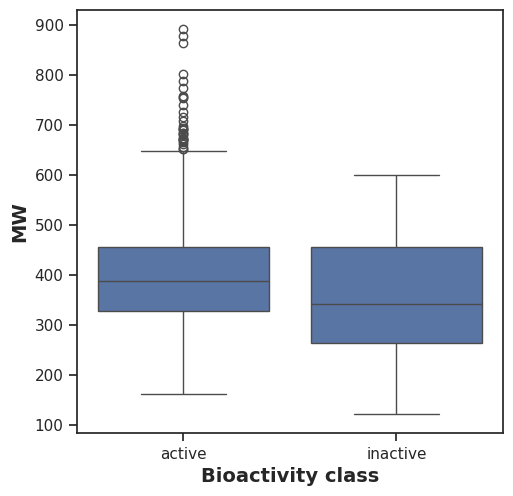

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,391713.0,1.622339e-09,0.05,Different distribution (reject H0)


#### **LogP**

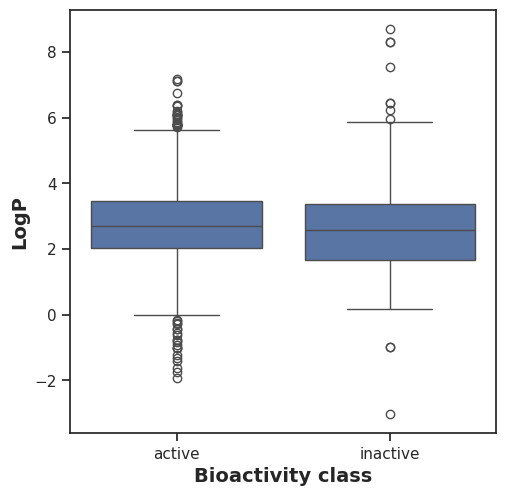

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,350147.0,0.018887,0.05,Different distribution (reject H0)


#### **NumHDonors**

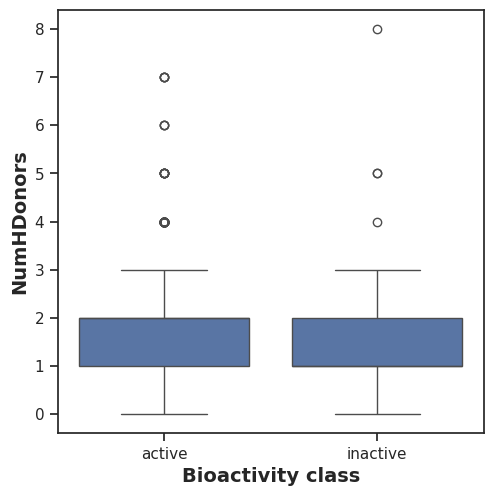

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,426404.5,1.064032e-22,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

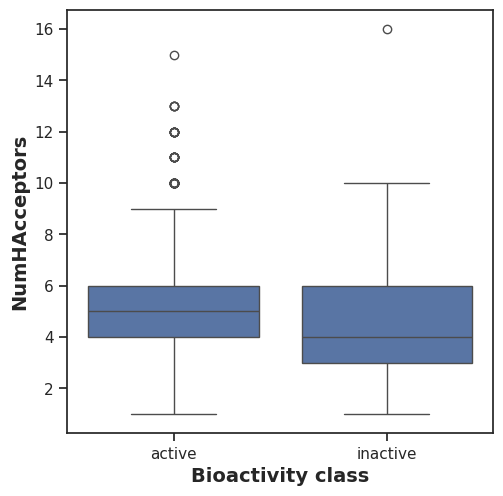

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,383168.0,7.477658e-08,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_MW.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: Diphtheria_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: Diphtheria_05_bioactivity_data_2class_pIC50.csv (deflated 78%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: Diphtheria_03_bioactivity_data_curated.csv (deflated 82%)
  adding: plot_ic50.pdf (deflated 38%)
